# 1. Import modules

In [1]:
import os
import glob
import random
import keras
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D, pooling
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. CNN modeling and training

In [3]:
categories = [("꼬깔콘", 0), ("꼬북칩", 1), ("맛동산", 2), ("새우깡", 3), ("에이스", 4), ("오징어 땅콩", 5), ("카스타드", 6), ("포카칩", 7), ("프링글스", 8), ("홈런볼", 9)]

X_train, y_train = [], []
X_test, y_test = [], []

In [5]:
for i, v in enumerate(categories) : 
    # one-hot encoding
    label = [0 for _ in range(len(categories))]
    label[i] = 1
    
    # path setting
    image_dir = "/content/drive/My Drive/data/train/" + v[0] + "/*.jpg"
    files = glob.glob(image_dir)
    
    # trainset setting
    for file in files :
        try:
            image = Image.open(file)
            image = image.convert("RGB")
            image = image.resize((128, 128))
            data = np.asarray(image)

            X_train.append(data)
            y_train.append(label)
        except Exception as e:
            print(e)
            pass

cannot identify image file '/content/drive/My Drive/data/train/꼬깔콘/꼬깔콘_3124.jpg'
cannot identify image file '/content/drive/My Drive/data/train/꼬깔콘/꼬깔콘_3357.jpg'
cannot identify image file '/content/drive/My Drive/data/train/꼬북칩/꼬북칩_3485.jpg'
cannot identify image file '/content/drive/My Drive/data/train/에이스/에이스_0949.jpg'
cannot identify image file '/content/drive/My Drive/data/train/에이스/에이스_0965.jpg'


In [6]:
for i, v in enumerate(categories) : 
    # one-hot encoding
    label = [0 for _ in range(len(categories))]
    label[i] = 1
    
    # path setting
    image_dir = "/content/drive/My Drive/data/test/" + v[0] + "/*.jpg"
    files = glob.glob(image_dir)
    
    # testset setting
    for file in files :
        try:
            image = Image.open(file)
            image = image.convert("RGB")
            image = image.resize((128, 128))
            data = np.asarray(image)

            X_test.append(data)
            y_test.append(label)
        except Exception as e:
            print(e)
            pass

cannot identify image file '/content/drive/My Drive/data/test/꼬북칩/꼬북칩_0127.jpg'


In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
# scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# define model architecture
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [11]:
# hyper parameter settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint 
model_path = "/content/drive/My Drive/snack_cnn.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [26]:
# train
history=model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=10, verbose=1, callbacks=[checkpoint])

Epoch 1/10
521/521 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9908
Epoch 1: val_loss did not improve from 5.76974
521/521 [==============================] - 6s 12ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 16.3340 - val_accuracy: 0.1928
Epoch 2/10
520/521 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9941
Epoch 2: val_loss did not improve from 5.76974
521/521 [==============================] - 6s 12ms/step - loss: 0.0207 - accuracy: 0.9941 - val_loss: 18.4816 - val_accuracy: 0.1733
Epoch 3/10
521/521 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9936
Epoch 3: val_loss did not improve from 5.76974
521/521 [==============================] - 6s 12ms/step - loss: 0.0235 - accuracy: 0.9936 - val_loss: 23.3605 - val_accuracy: 0.1112
Epoch 4/10
519/521 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9940
Epoch 4: val_loss did not improve from 5.76974
521/521 [====================

In [25]:
# evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.9488551616668701, 0.9181784391403198]


# 3. CNN training history

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epoch_range = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

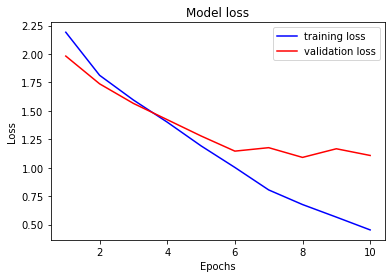

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss graph visualization
plt.plot(epoch_range, loss, 'b', label='training loss')
plt.plot(epoch_range, val_loss, 'r', label='validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

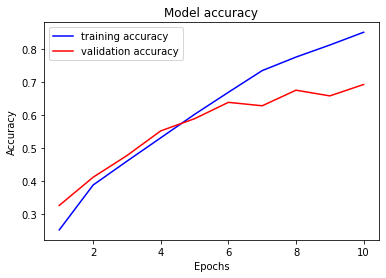

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy graph visualization
plt.plot(epoch_range, acc, 'b', label='training accuracy')
plt.plot(epoch_range, val_acc, 'r', label='validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# 4. Resnet modeling and training

In [27]:
# Function defining a convolutional block for a resnet
def convolutional_block(X, filters, kernel_size):
    
    # Save the input tensor in 'X_shortcut' for later use
    X_shortcut = X
    
    # First convolutional layer: Convolution, Batch Normalization, and ReLU activation
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    # Second convolutional layer: Convolution, Batch Normalization, and ReLU activation
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    # Third convolutional layer: Convolution and Batch Normalization
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    
    # Implement the skip connection
    X_shortcut = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)
    
    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

In [28]:
# Function defining a identity block for a resnet
def identity_block(X, filters, kernel_size):
    
    # Save the input tensor in 'X_shortcut' for later use
    X_shortcut = X
    
    # First layer: 2D convolution, fBatch Normalization and ReLU activation
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    # Second layer: 2D convolution, fBatch Normalization and ReLU activation
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    # Third layer: 2D convolution, fBatch Normalization
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    
    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

In [29]:
# Function defining a resnet
def ResNet50CL(input_shape = (128, 128, 3), classes = 10):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input
    
    X = convolutional_block(X, 128, (3,3)) #conv
    X = identity_block(X, 128, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = convolutional_block(X, 256, (3,3)) #64->128, use conv block
    X = identity_block(X, 256, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = convolutional_block(X, 512, (3,3)) #128->256, use conv block
    X = identity_block(X, 512, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = convolutional_block(X, 1024, (3,3)) #256->512, use conv block
    X = identity_block(X, 1024, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dense(10, activation = 'softmax')(X) # ouput layer (10 class)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50CL")
    
    return model

In [30]:
# instantiate model and compile
model = ResNet50CL()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "ResNet50CL"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 128, 128, 12  3584        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 12  512        ['conv2d_2[0][0]']               
 alization)                     8)                                                       

In [32]:
# hyper parameter settings
EPOCH = 10
BATCH_SIZE = 32
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=10, 
                             )

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
)

# checkpoint 
model_path = "/content/drive/My Drive/snack_resnet.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only = True)

In [33]:
# train
data = model.fit(X_train, 
                 y_train, 
                 validation_split = 0.1, 
                 epochs=EPOCH, 
                 batch_size=BATCH_SIZE, 
                 callbacks=[reduceLR, earlystopping, checkpoint])

Epoch 1/10
521/521 [==============================] - ETA: 0s - loss: 0.9916 - accuracy: 0.6818
Epoch 1: val_loss improved from inf to 7.56066, saving model to /content/drive/My Drive/snack_resnet.model


521/521 [==============================] - 132s 244ms/step - loss: 0.9916 - accuracy: 0.6818 - val_loss: 7.5607 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10
521/521 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.8324
Epoch 2: val_loss did not improve from 7.56066
521/521 [==============================] - 111s 212ms/step - loss: 0.5289 - accuracy: 0.8324 - val_loss: 28.0814 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/10
521/521 [==============================] - ETA: 0s - loss: 0.3665 - accuracy: 0.8864
Epoch 3: val_loss did not improve from 7.56066
521/521 [==============================] - 111s 212ms/step - loss: 0.3665 - accuracy: 0.8864 - val_loss: 12.7824 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/10
521/521 [==============================] - ETA: 0s - loss: 0.2849 - accuracy: 0.9117
Epoch 4: val_loss did not improve from 7.56066
521/521 [==============================] - 111s 212ms/step - loss: 0.2849 - accuracy: 0.9117 - val_loss: 12.3469 

In [34]:
# evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.763730525970459, 0.7241762280464172]


# 5. Resnet training history

In [ ]:
acc = data.history['accuracy']
loss = data.history['loss']
val_acc = data.history['val_accuracy']
val_loss = data.history['val_loss']
epoch_range = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

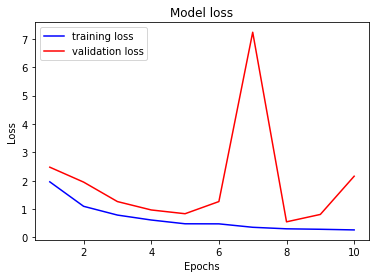

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss graph visualization
plt.plot(epoch_range, loss, 'b', label='training loss')
plt.plot(epoch_range, val_loss, 'r', label='validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

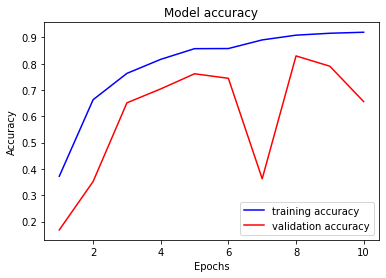

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy graph visualization
plt.plot(epoch_range, acc, 'b', label='training accuracy')
plt.plot(epoch_range, val_acc, 'r', label='validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()